In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [66]:
df_def=pd.read_csv("/content/train_data.csv")
df_def.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


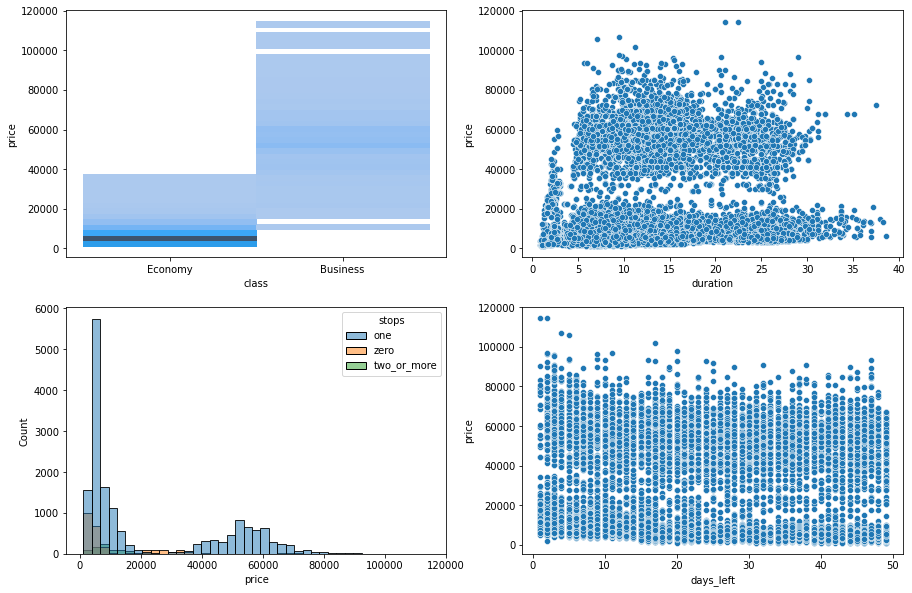

In [22]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.histplot(ax=ax[0,0],data=df,y='price',x='class')
sns.scatterplot(ax=ax[0,1],data=df,y='price',x='duration')
sns.histplot(ax=ax[1,0],data=df,x='price',hue='departure_time')
sns.scatterplot(ax=ax[1,1],data=df,y='price',x='days_left')
plt.show()

In [67]:
df=df_def.apply(LabelEncoder().fit_transform)

In [40]:
df=df.drop('id',axis=1)

In [41]:
df.corr().abs()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.642372,0.017651,0.050009,0.030196,0.036642,0.035735,0.174770,0.008168,0.024465,0.255012
flight,0.642372,1.000000,0.006480,0.064077,0.114132,0.068596,0.035784,0.255043,0.199707,0.005775,0.319335
source_city,0.017651,0.006480,1.000000,0.006443,0.002982,0.037453,0.231524,0.007379,0.006852,0.003307,0.016672
departure_time,0.050009,0.064077,0.006443,1.000000,0.019553,0.040011,0.011299,0.057410,0.092503,0.006627,0.056057
stops,0.030196,0.114132,0.002982,0.019553,1.000000,0.007015,0.015075,0.096970,0.482957,0.023782,0.210727
arrival_time,0.036642,0.068596,0.037453,0.040011,0.007015,1.000000,0.031399,0.035101,0.012370,0.010408,0.047022
destination_city,0.035735,0.035784,0.231524,0.011299,0.015075,0.031399,1.000000,0.002545,0.012463,0.011963,0.014608
class,0.174770,0.255043,0.007379,0.057410,0.096970,0.035101,0.002545,1.000000,0.146080,0.022332,0.837377
duration,0.008168,0.199707,0.006852,0.092503,0.482957,0.012370,0.012463,0.146080,1.000000,0.019746,0.269074
days_left,0.024465,0.005775,0.003307,0.006627,0.023782,0.010408,0.011963,0.022332,0.019746,1.000000,0.276843


In [42]:
df.corrwith(df['price']).abs()

airline             0.255012
flight              0.319335
source_city         0.016672
departure_time      0.056057
stops               0.210727
arrival_time        0.047022
destination_city    0.014608
class               0.837377
duration            0.269074
days_left           0.276843
price               1.000000
dtype: float64

In [48]:
X=df.drop(df[['price','destination_city','arrival_time','source_city','departure_time']],axis=1)
y=df[['price']].copy()

In [51]:
LR_model=LinearRegression()
LR_model.fit(X,y)

LinearRegression()

In [73]:
df_testi=pd.read_csv('/content/test_data.csv')
df_testi.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [74]:
df_test=df_testi.apply(LabelEncoder().fit_transform)
X=df_test.drop(df_test[['destination_city','arrival_time','source_city','departure_time','id']],axis=1)

In [77]:
y_predicted=LR_model.predict(X)
df_predicted=pd.DataFrame(y_predicted,columns=['Predicted_Price'])
df_predicted

,Predicted_Price
0,4581.014242
1,3753.413816
2,2924.895001
3,1005.380447
4,1034.629454
...,...
4995,4010.480992
4996,383.137543
4997,3277.804825
4998,3305.374248


In [80]:
df_solution=pd.read_csv('/content/sample_solution.csv')
df_solution['prediction']=df_predicted
df_solution

,id,price,prediction
0,1,0,4581.014242
1,2,0,3753.413816
2,3,0,2924.895001
3,4,0,1005.380447
4,5,0,1034.629454
...,...,...,...
4995,4996,0,4010.480992
4996,4997,0,383.137543
4997,4998,0,3277.804825
4998,4999,0,3305.374248
